# Problem statement: Predict temperatures in Algerian forest dataset using linear regression algorithm

## Dataset link

https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

### Data ingestion & EDA

#### Target variable name 'Class' changed to 'Result' as it shows 'keyerror' while executing

In [171]:
import pandas as pd

In [172]:
ff = pd.read_excel('Algerian_forest_fires_dataset_UPDATED.xlsx',header = 1)

In [173]:
ff.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Result
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [174]:
ff.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Result
count,246,245,245,245,245,245,245,245.0,245.0,245,245.0,245,245.0,245
unique,33,5,2,20,63,19,40,174.0,167.0,199,107.0,174,127.0,9
top,1,7,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8.0,5.0,5,8.0,5,12.0,132


In [175]:
ff['day'].value_counts()

1                                8
2                                8
30                               8
29                               8
28                               8
27                               8
26                               8
25                               8
24                               8
23                               8
22                               8
21                               8
20                               8
19                               8
18                               8
17                               8
16                               8
15                               8
3                                8
4                                8
5                                8
6                                8
7                                8
8                                8
9                                8
10                               8
11                               8
12                               8
13                  

In [176]:
print(ff[ff['day'] == "Sidi-Bel Abbes Region Dataset"])

                               day month year Temperature   RH   Ws Rain   \
123  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN   NaN   

    FFMC  DMC   DC  ISI  BUI  FWI Result  
123  NaN  NaN  NaN  NaN  NaN  NaN    NaN  


In [177]:
print(ff[ff['day'] == "day"])

     day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI  \
124  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI     Result  
124  FWI  Classes    


In [178]:
ff = ff.drop(labels = [123,124], axis = 0) #removing unwanted columns

In [179]:
ff['day']

0       1
1       2
2       3
3       4
4       5
       ..
242    26
243    27
244    28
245    29
246    30
Name: day, Length: 245, dtype: object

In [180]:
ff

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Result
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [181]:
ff.isnull().sum()

day            1
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Result         1
dtype: int64

In [182]:
ff.dropna(inplace= True) #removing empty column

In [183]:
ff

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Result
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [184]:
cat_feat = [features for features in ff.columns if ff[features].dtypes == 'O']

In [185]:
cat_feat

['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Result']

In [186]:
ff.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Result'],
      dtype='object')

#### All features are object. Converting to numeric

In [187]:
ff.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Result         object
dtype: object

In [188]:
len(ff.columns)-2

12

In [189]:
for feat in ff.columns:
    if feat != 'Result':
        ff[feat] = pd.to_numeric(ff[feat]) 

In [190]:
pd.to_numeric(ff['day'])

0       1
1       2
2       3
3       4
4       5
       ..
242    26
243    27
244    28
245    29
246    30
Name: day, Length: 244, dtype: int64

In [191]:
ff.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Result          object
dtype: object

In [192]:
ff.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Result
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [193]:
num_feat = [features for features in ff.columns if ff[features].dtypes != 'O']

In [194]:
num_feat

['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

#### Checking data distribution

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

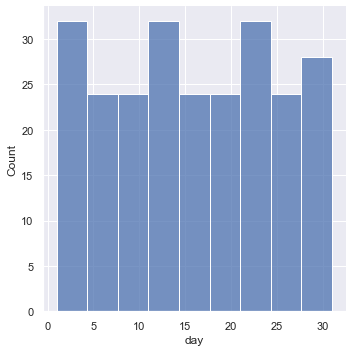

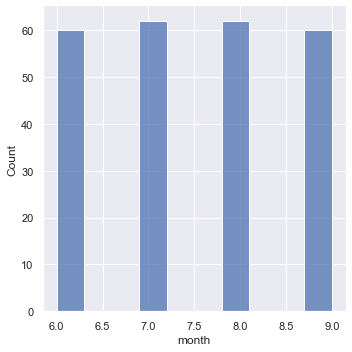

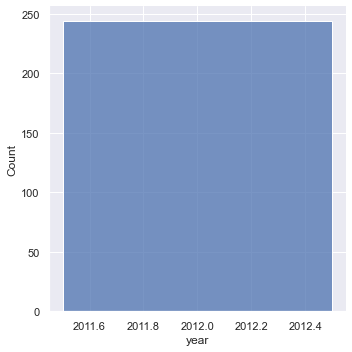

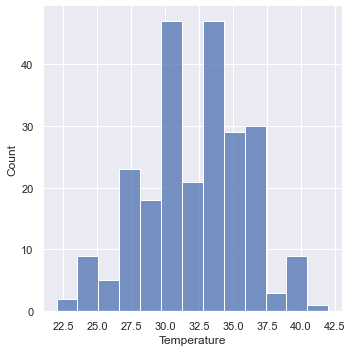

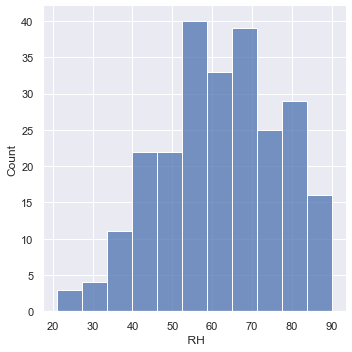

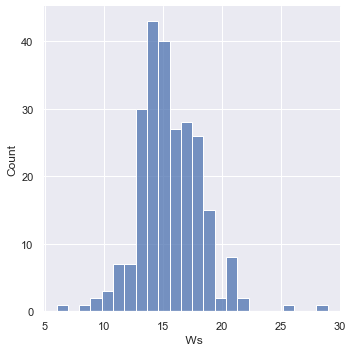

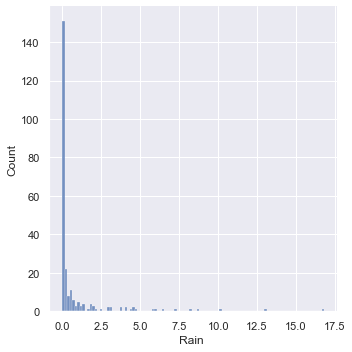

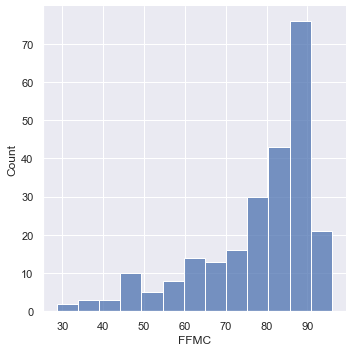

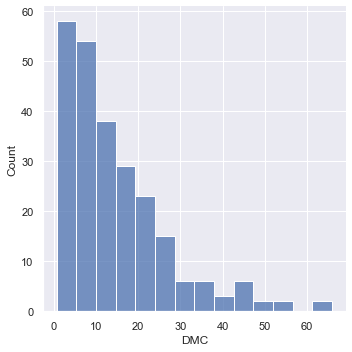

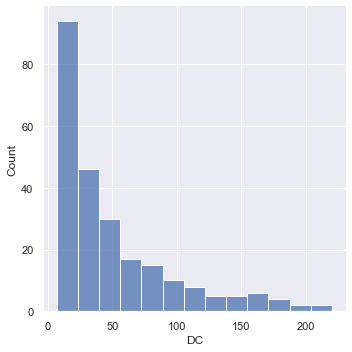

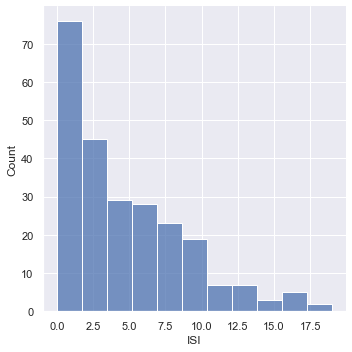

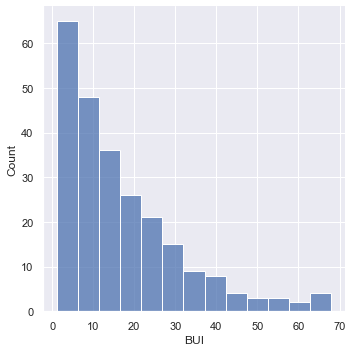

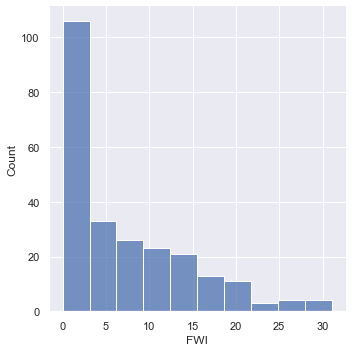

In [196]:
for i in range(len(num_feat)):
    sns.displot(ff[num_feat[i]])

C:\Users\SrinivaS\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


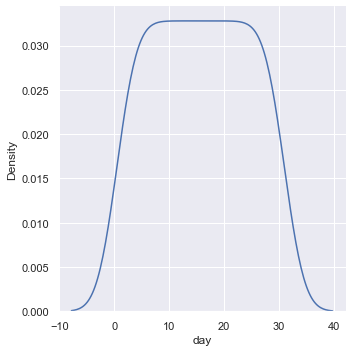

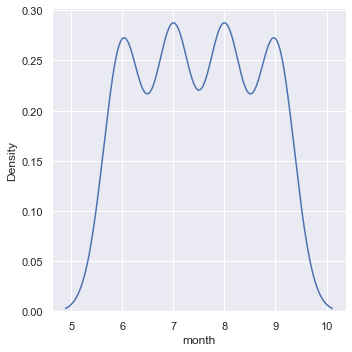

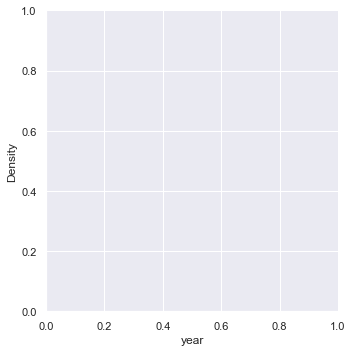

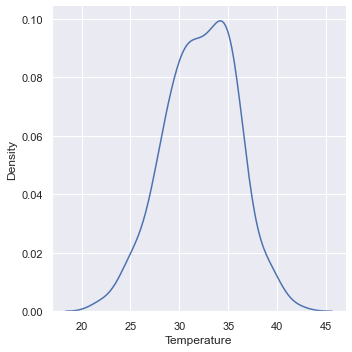

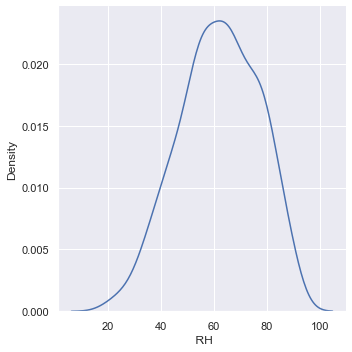

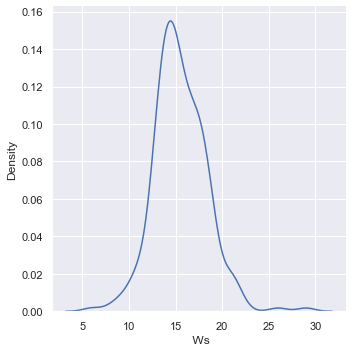

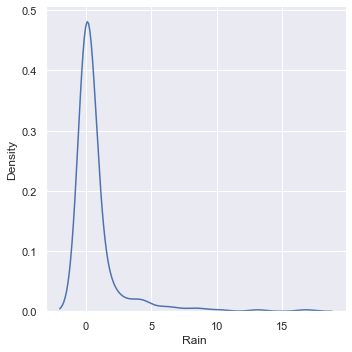

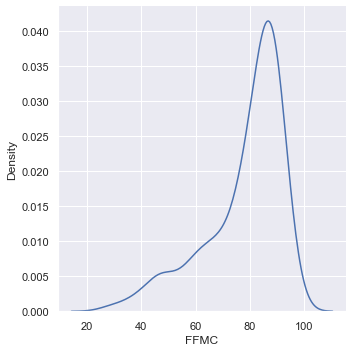

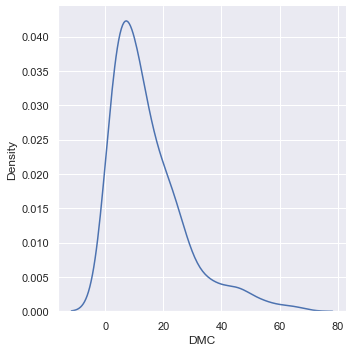

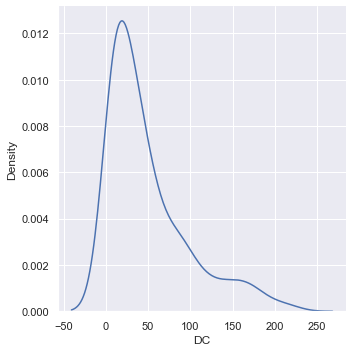

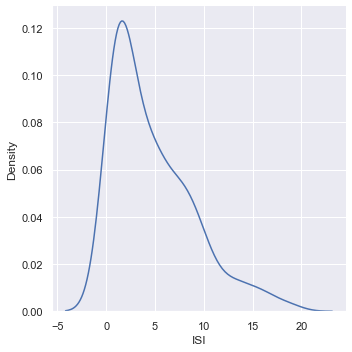

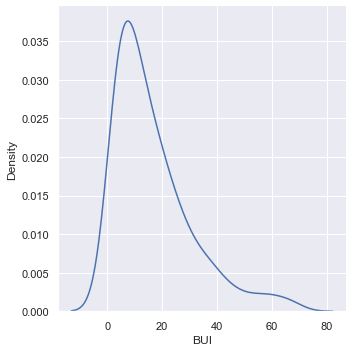

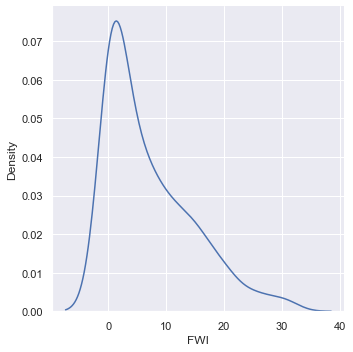

In [197]:
for i in range(len(num_feat)):
    sns.displot(ff[num_feat[i]],kind = 'kde')

### Observation:

Starting from 'Rain' all features are right skewed except 'FFMC' which is left skewed

In [198]:
cat_feat = [features for features in ff.columns if ff[features].dtypes == 'O']

In [199]:
cat_feat

['Result']

In [200]:
ff.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,5.279285e-01,1.276719e-01,NaN,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041


### Observation

1) Day, month are not much co related with tempearture
2) Some features like Rain, DC have only around 30% corelation with target feature 'Temparature'

<AxesSubplot:>

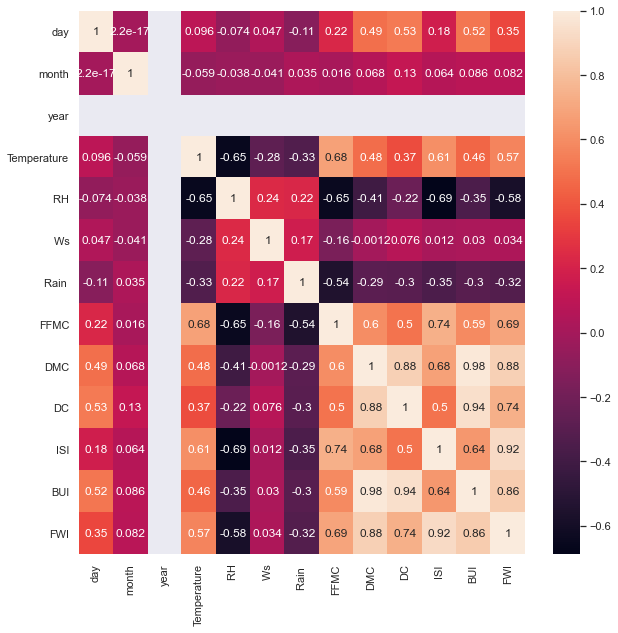

In [201]:
sns.set(rc = {'figure.figsize' : (10,10)})
sns.heatmap(ff.corr(), annot= True)

#### Checking each feature relation with Target feature

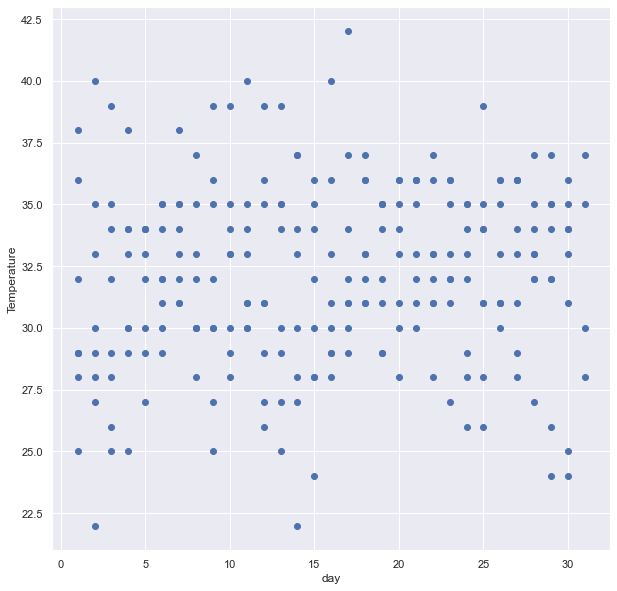

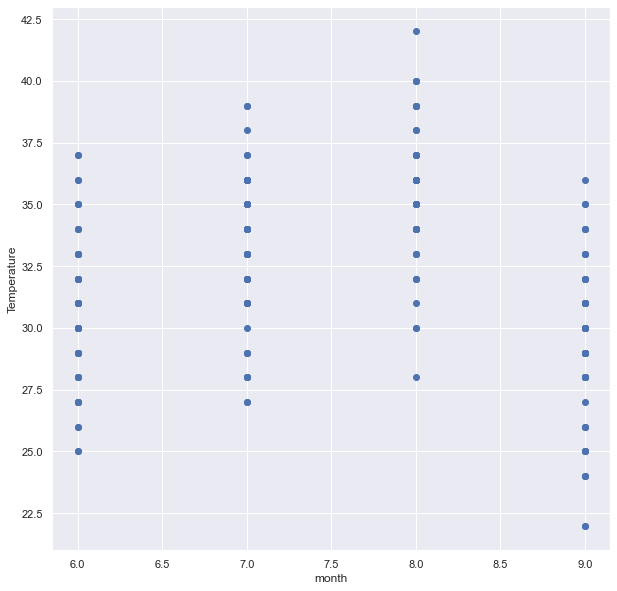

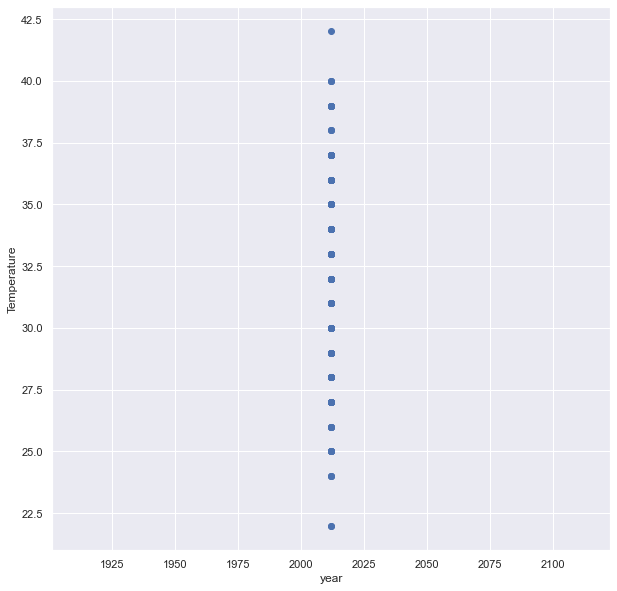

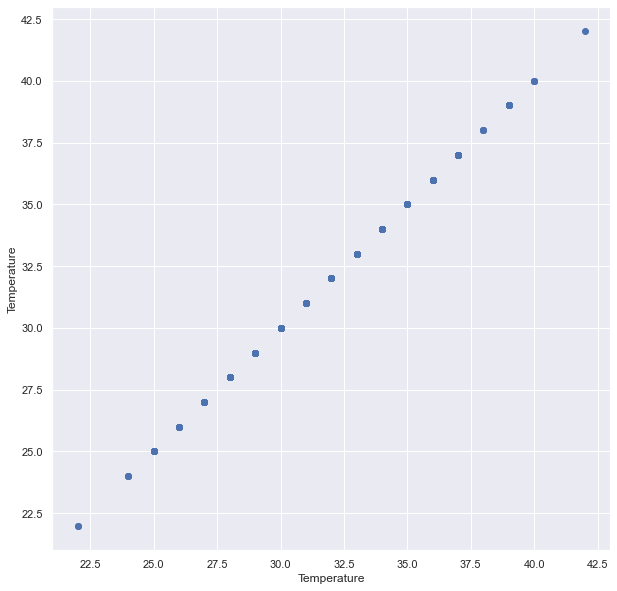

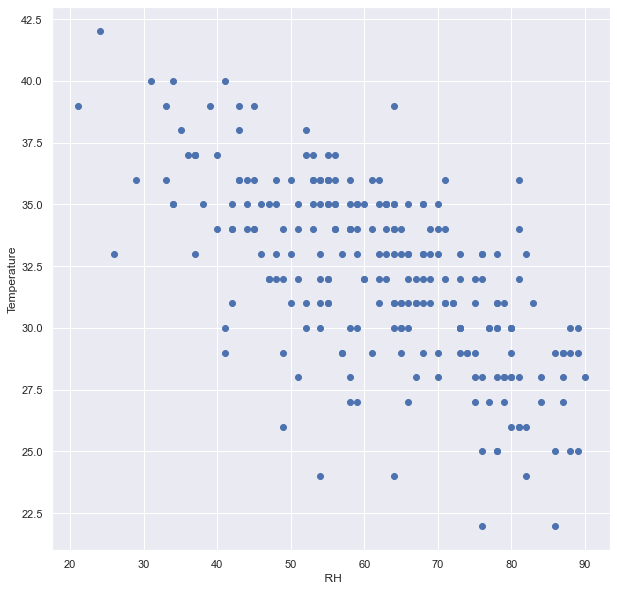

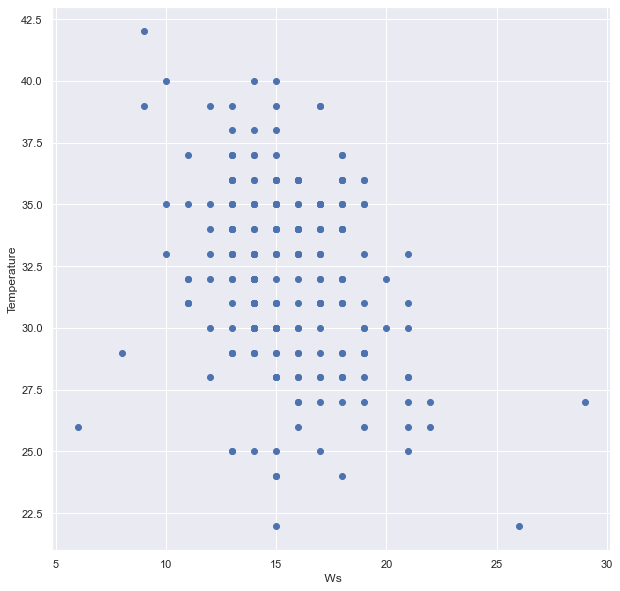

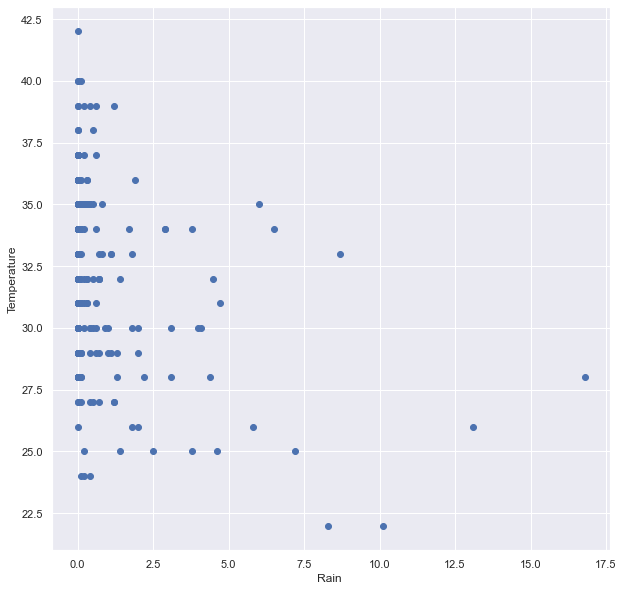

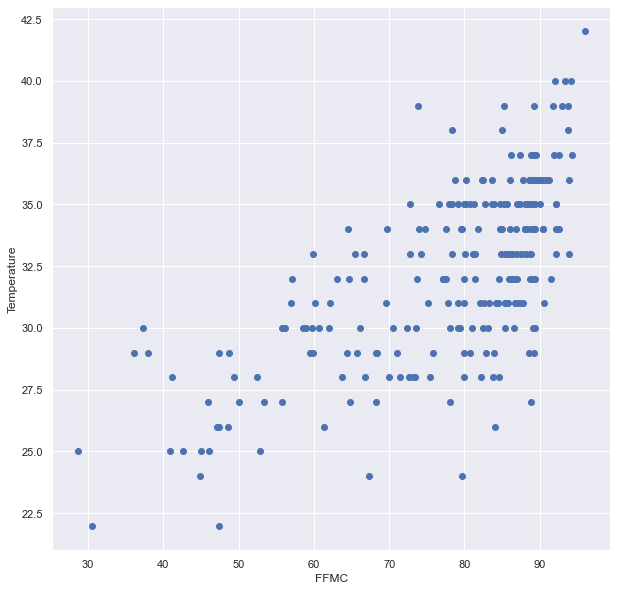

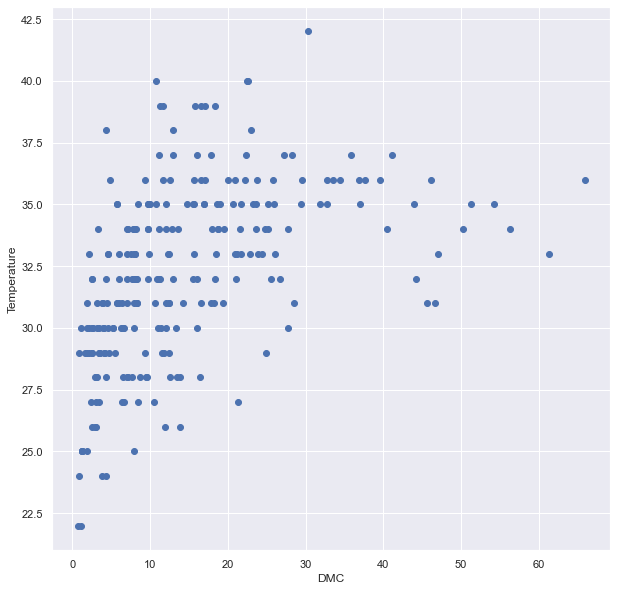

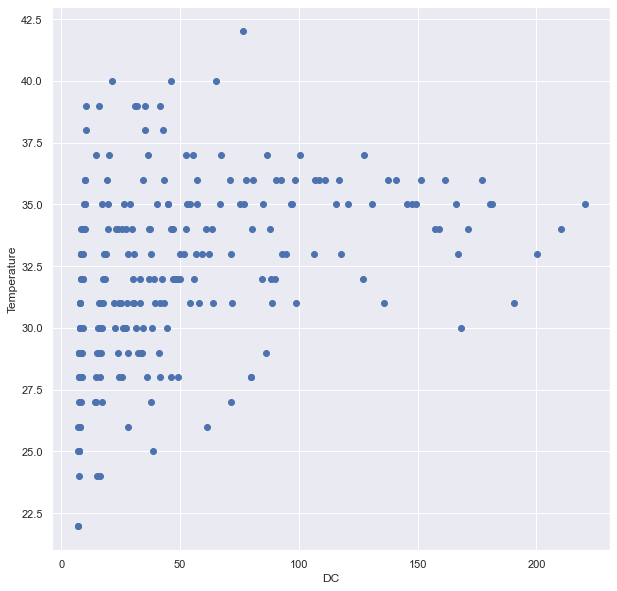

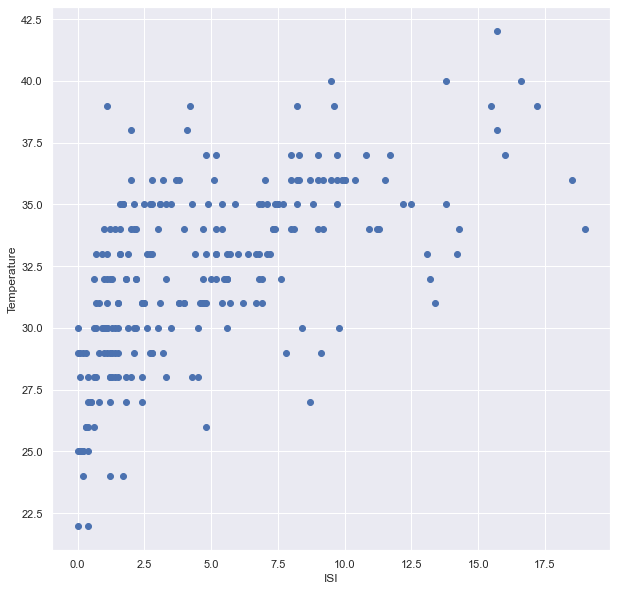

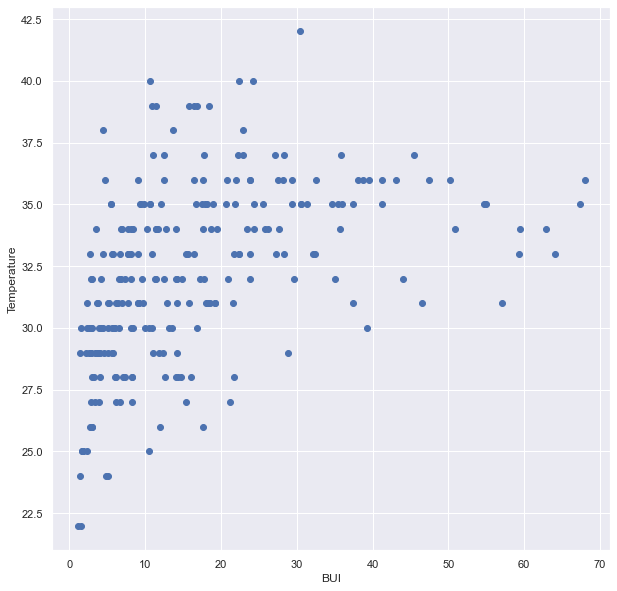

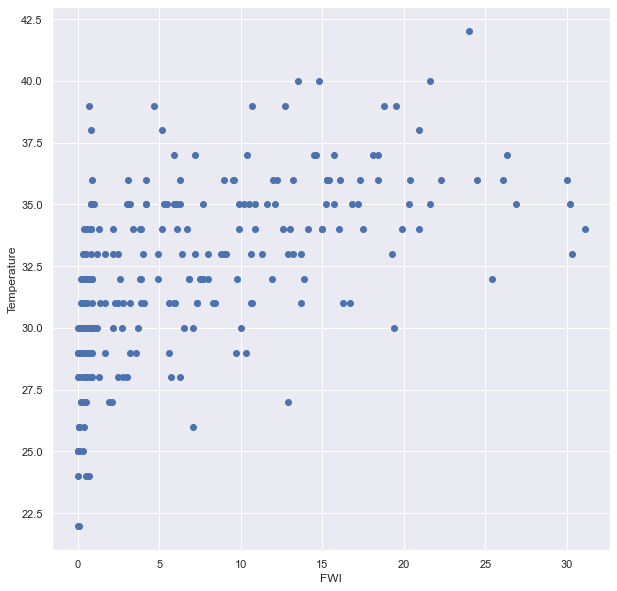

In [202]:
for i in range(len(num_feat)):
    plt.scatter(x = ff[num_feat[i]], y = ff['Temperature']) 
    plt.xlabel(num_feat[i])
    plt.ylabel('Temperature')
    plt.show()

#### Checking outliers

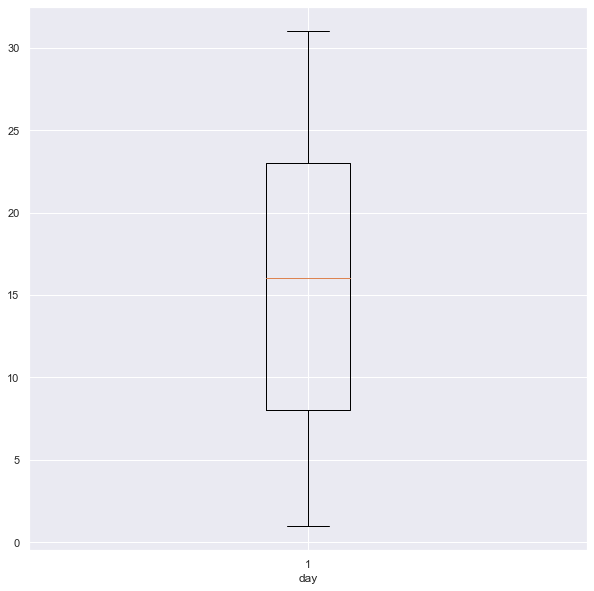

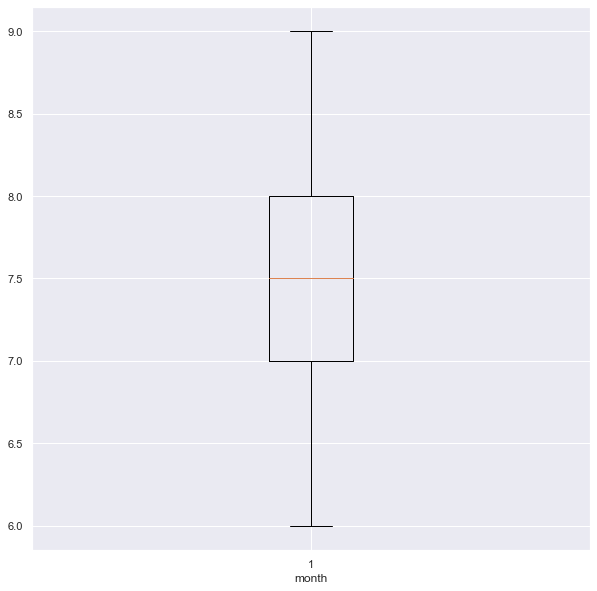

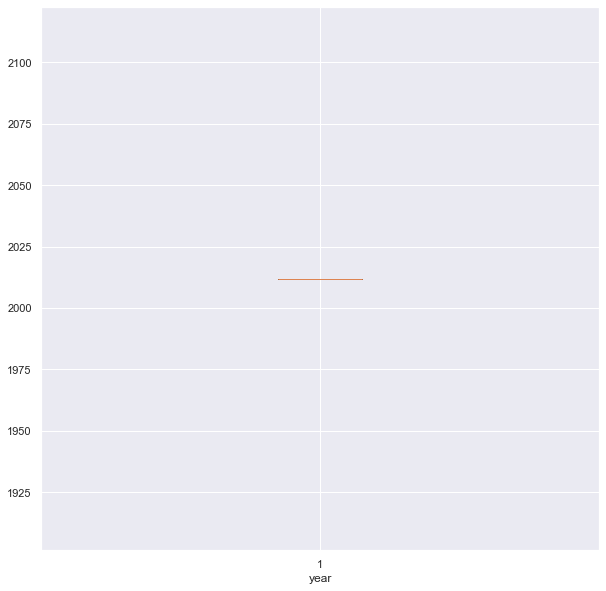

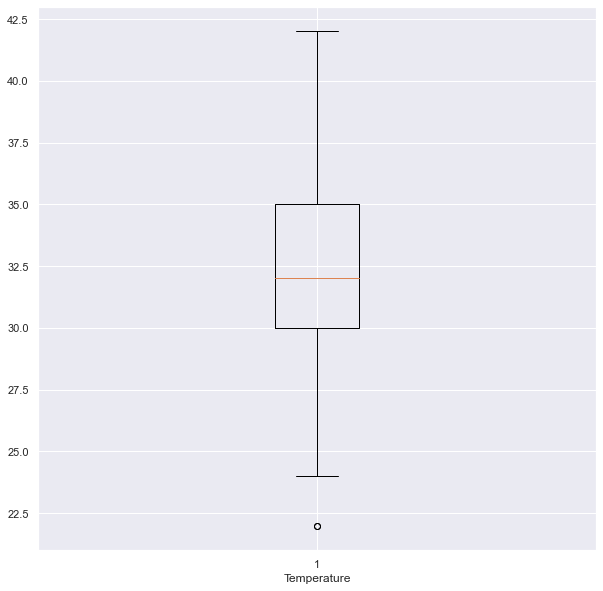

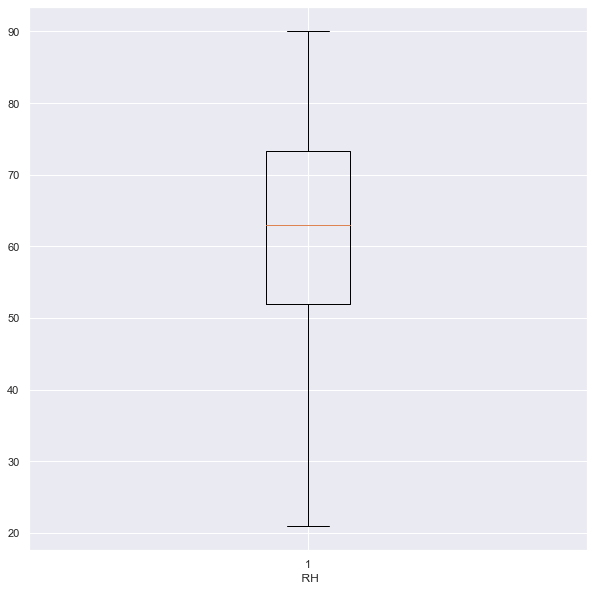

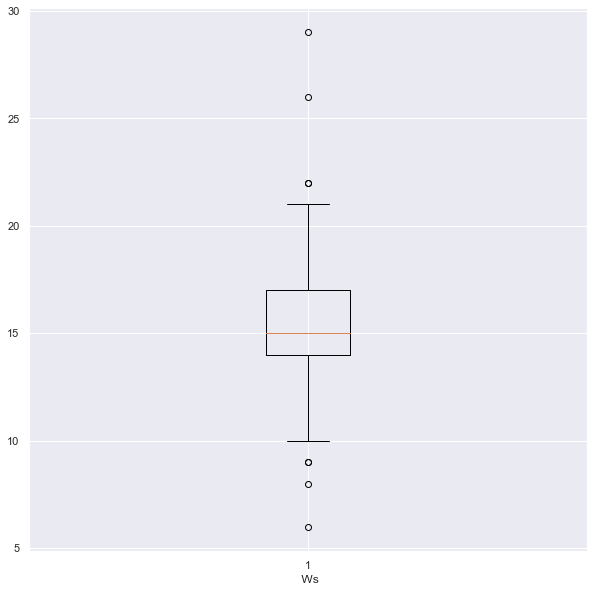

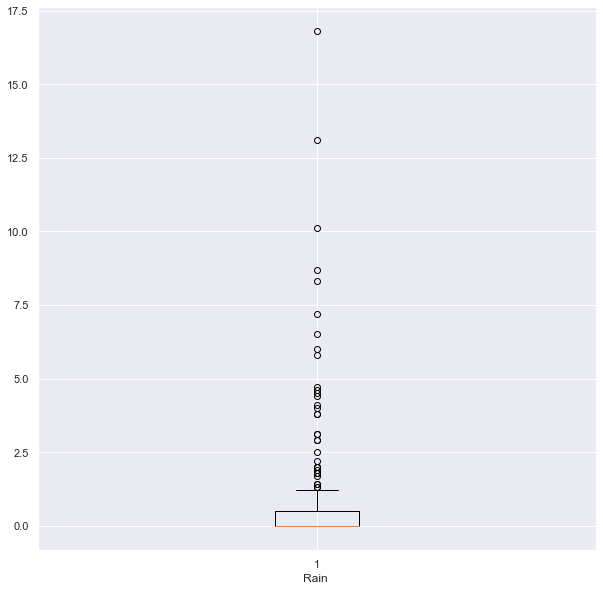

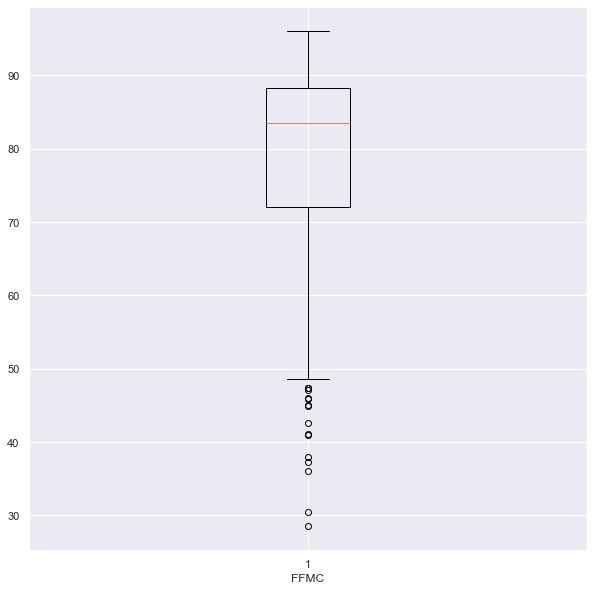

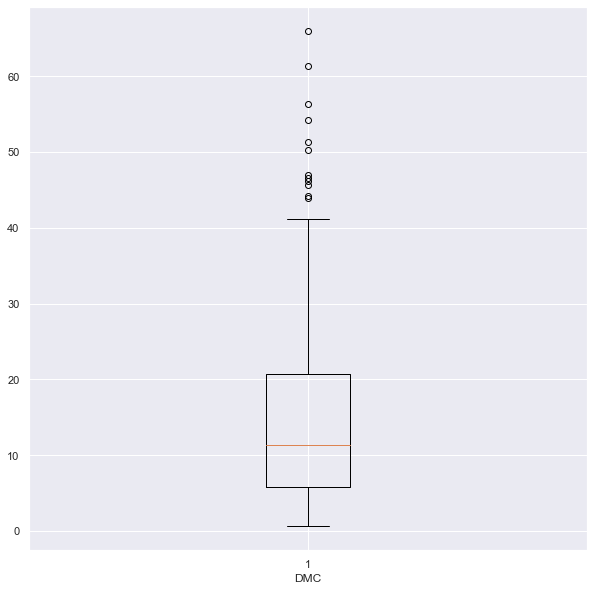

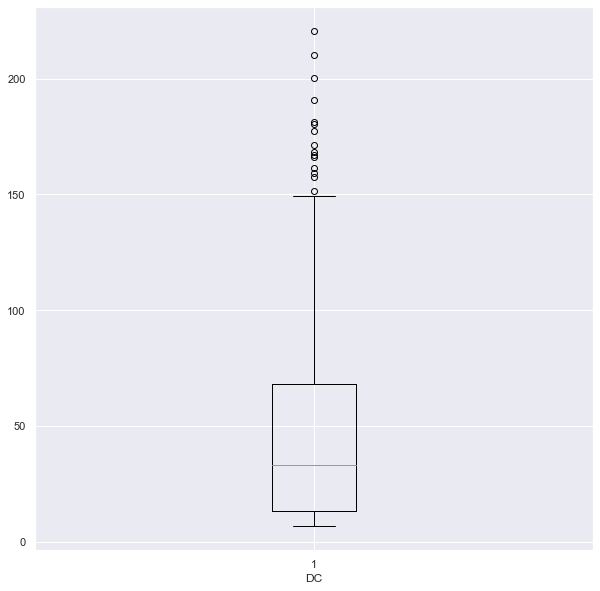

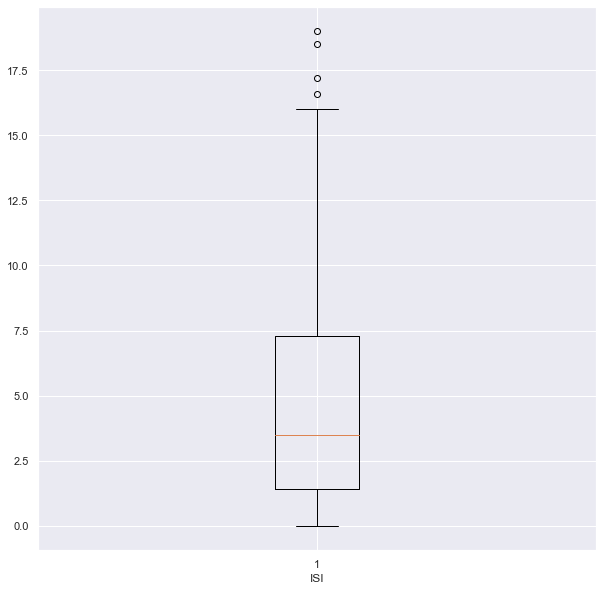

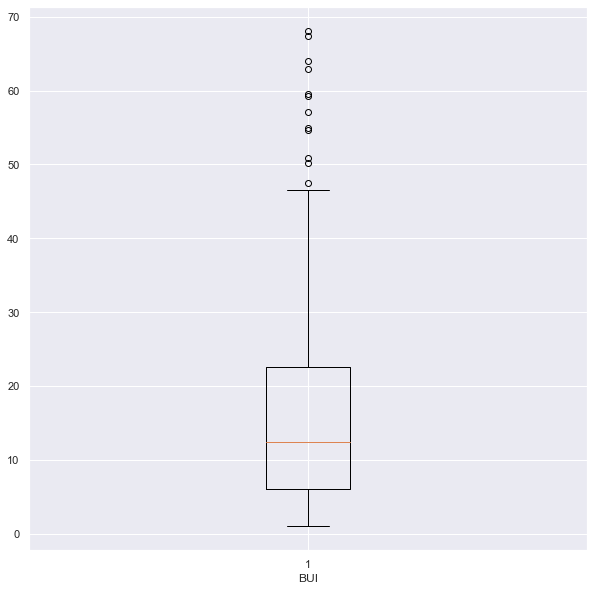

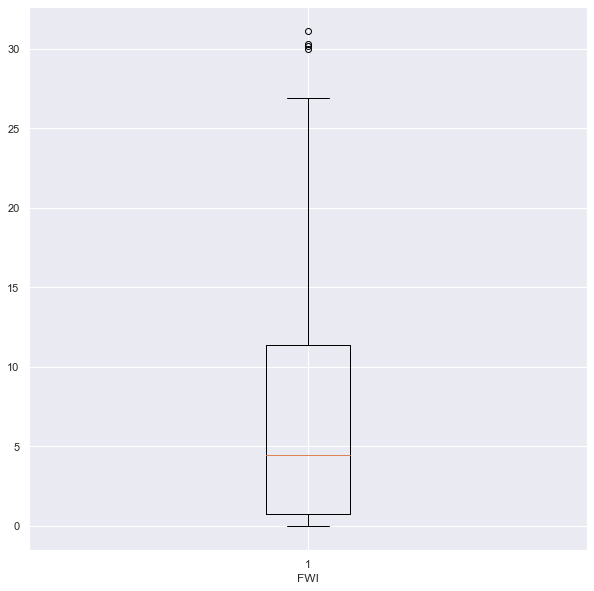

In [203]:
for i in range(len(num_feat)):
    plt.boxplot(ff[num_feat[i]]) 
    plt.xlabel(num_feat[i])
    plt.show()

In [204]:
ff['Result'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [205]:
ff['Result'].str.strip().unique() #removing white spaces from data in target variable

array(['not fire', 'fire'], dtype=object)

In [206]:
ff['Result'] = ff['Result'].str.strip() #removing white spaces from data in target variable

In [207]:
ff['Result'] = pd.get_dummies(ff['Result'])  #One hot encoding
ff['Result'].value_counts()

1    138
0    106
Name: Result, dtype: int64

#### Splitting data before feature engg to avoid data leakage

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train,X_test,y_train,y_test = train_test_split(ff,ff['Result'], test_size = 0.25, random_state = 10)

In [210]:
drop_feat = ['day','year','Result']

#dropping day as any relation it may have with Target variable is covered by 'month' feature

X_train.drop(drop_feat,axis =1,inplace= True)

C:\Users\SrinivaS\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### converting skewed distributions to normal distribution

In [211]:
num_feat.index('FFMC')

7

In [212]:
rh_skew_feat = num_feat[6:]

In [213]:
rh_skew_feat

['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [214]:
rh_skew_feat.remove('FFMC')

In [215]:
rh_skew_feat

['Rain ', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [216]:
for i in rh_skew_feat:
    print(0 in ff[i].unique())

True
False
False
True
False
True


In [217]:
X_train.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
58,7,32,73,15,0.0,86.6,26.7,127.0,5.6,35.0,11.9
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
68,8,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,2.6
187,8,40,34,14,0.0,93.3,10.8,21.4,13.8,10.6,13.5


In [218]:
import numpy as np

In [219]:
for feat in rh_skew_feat:
    
    X_copy = X_train.copy()
    
    if 0 in X_train[feat].unique():
        X_train[feat] = np.log((X_train[feat] + 1))
    
    else:
        X_train[feat] = np.log(X_train[feat])

<ipython-input-219-eae051fce65c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feat] = np.log((X_train[feat] + 1))
<ipython-input-219-eae051fce65c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feat] = np.log(X_train[feat])


In [220]:
X_train.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
58,7,32,73,15,0.000000,86.6,3.284664,4.844187,1.887070,3.555348,2.557227
1,6,29,61,13,0.832909,64.4,1.410987,2.028148,0.693147,1.360977,0.336472
2,6,26,82,22,2.646175,47.1,0.916291,1.960095,0.262364,0.993252,0.095310
68,8,32,60,18,0.262364,77.1,2.424803,3.850148,1.163151,2.646175,1.280934
187,8,40,34,14,0.000000,93.3,2.379546,3.063391,2.694627,2.360854,2.674149


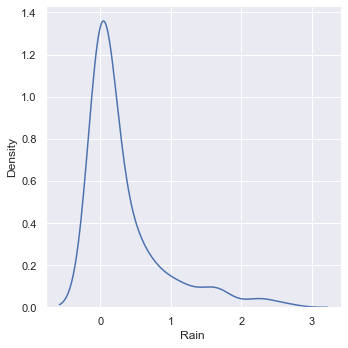

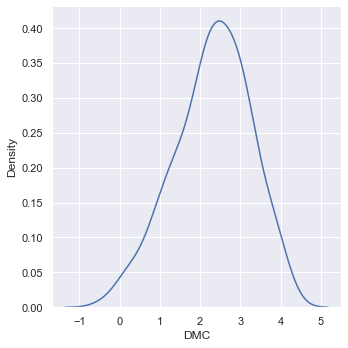

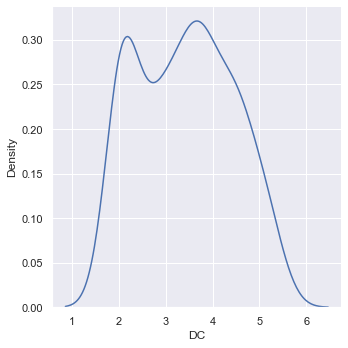

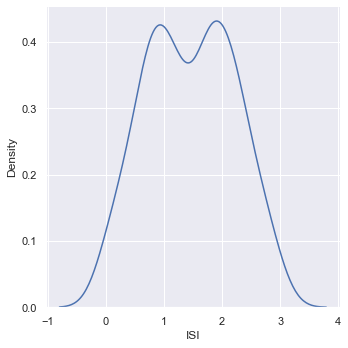

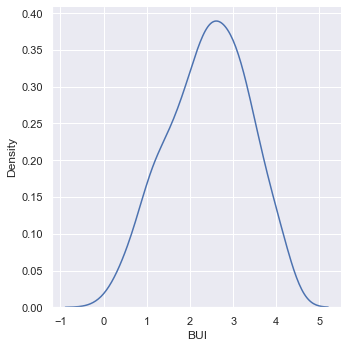

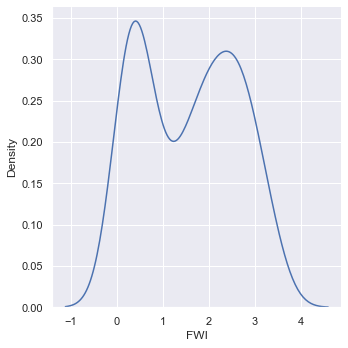

In [221]:
for i in range(len(rh_skew_feat)):
    sns.displot(X_train[rh_skew_feat[i]],kind = 'kde')

#### Treating outliers

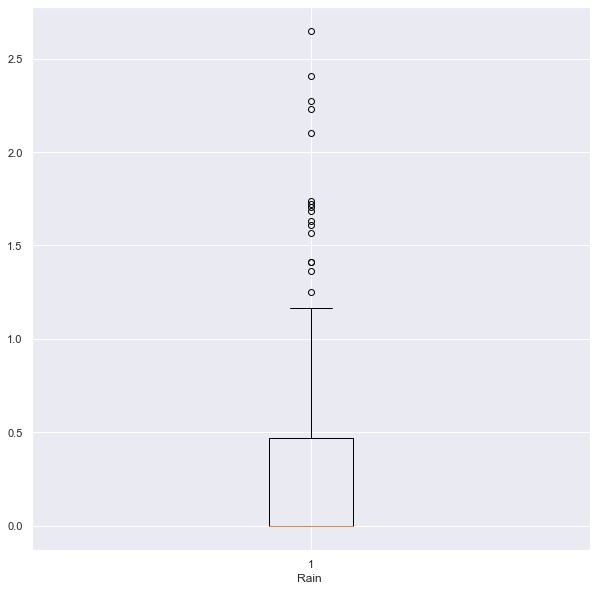

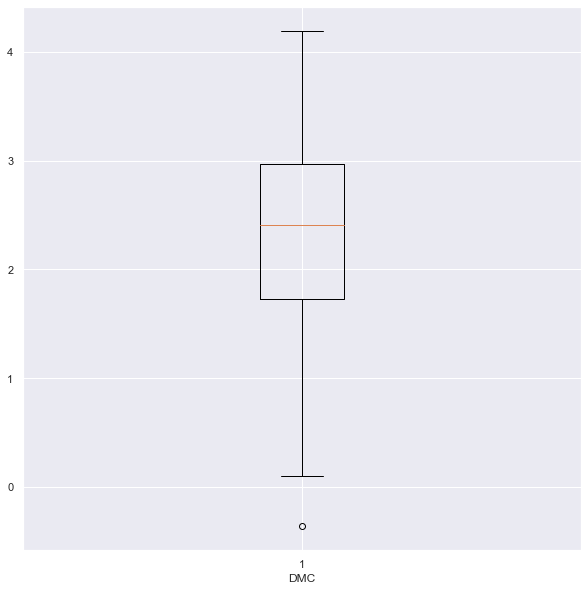

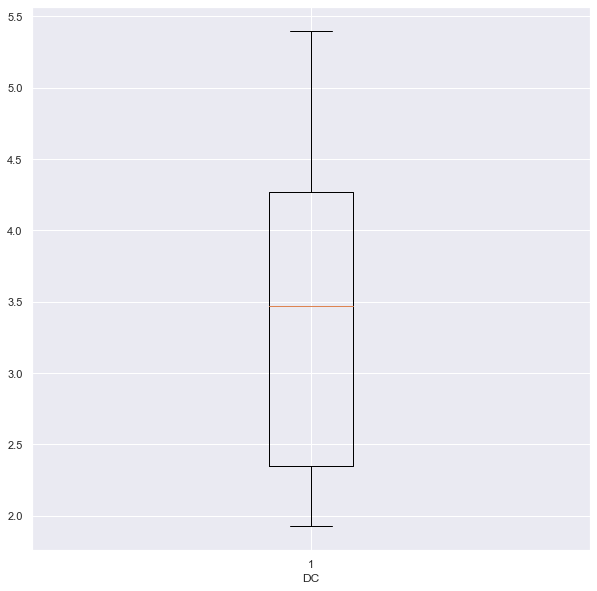

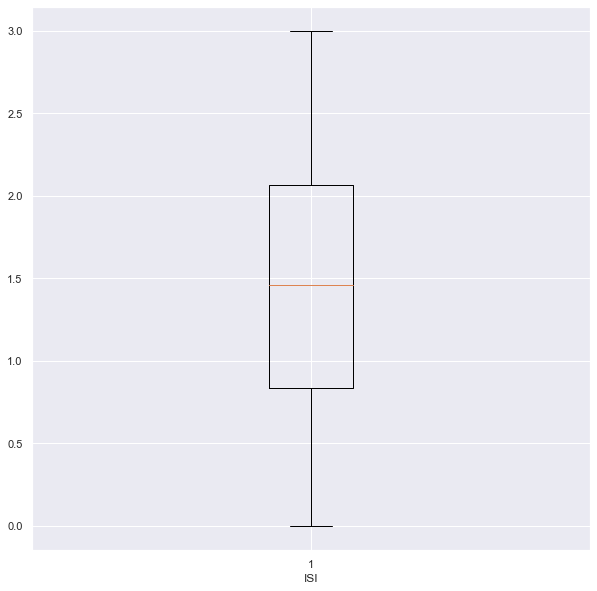

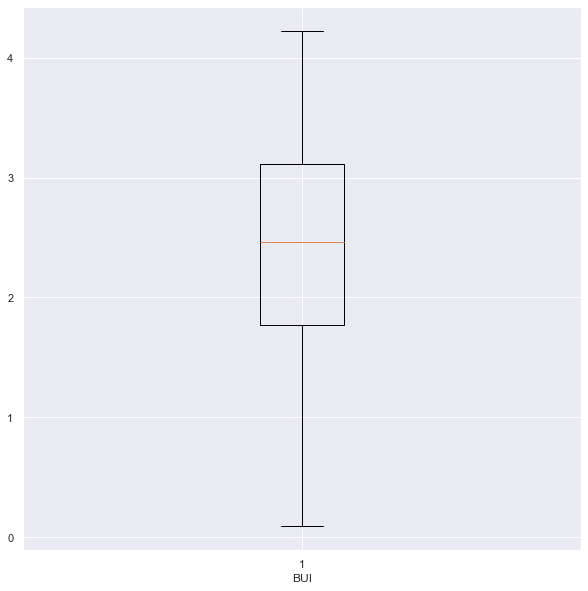

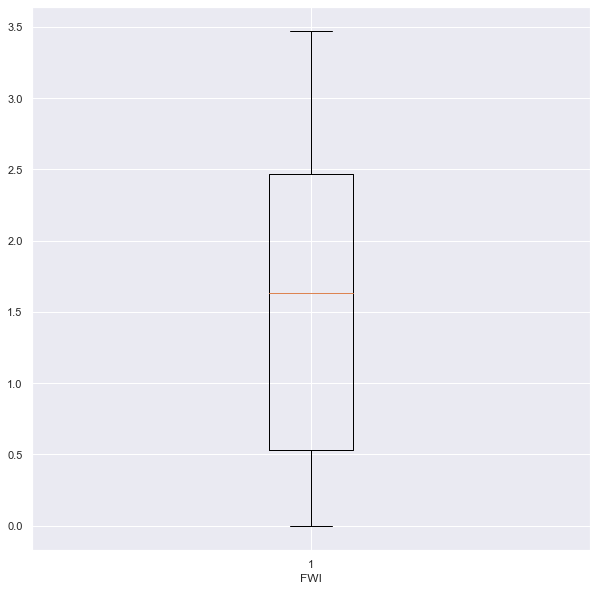

In [222]:
for i in range(len(rh_skew_feat)):
    plt.boxplot(X_train[rh_skew_feat[i]]) 
    plt.xlabel(rh_skew_feat[i])
    plt.show()

C:\Users\SrinivaS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rain ', ylabel='count'>

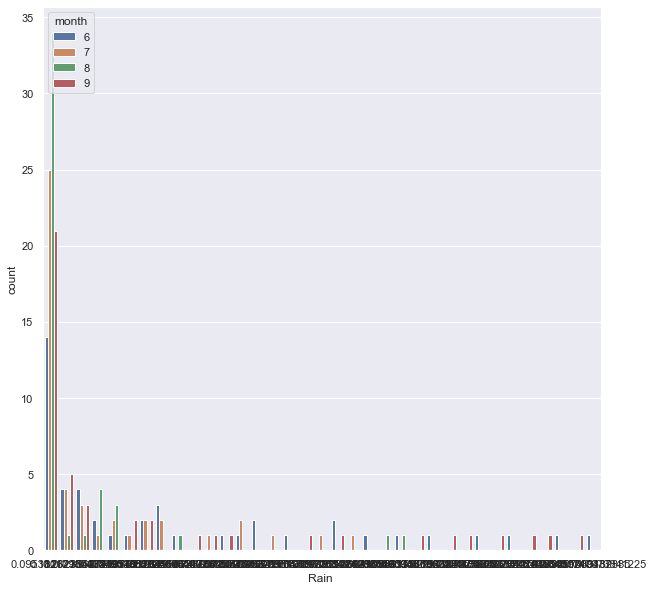

In [223]:
sns.countplot(X_train['Rain '], hue = ff['month'])

In [224]:
q1 = X_train['Rain '].quantile(.25)
q1

0.0

In [225]:
q3 = X_train['Rain '].quantile(.75)
q3

0.47000362924573563

In [226]:
IQR = q3-q1
IQR

0.47000362924573563

In [227]:
up_lim = q3 + (1.5*IQR)
up_lim

1.175009073114339

In [228]:
low_lim = q1 - (1.5*IQR)
low_lim

-0.7050054438686034

In [229]:
X_train[X_train['Rain ']<low_lim]

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI


In [230]:
X_train[X_train['Rain ']<up_lim]

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
58,7,32,73,15,0.000000,86.6,3.284664,4.844187,1.887070,3.555348,2.557227
1,6,29,61,13,0.832909,64.4,1.410987,2.028148,0.693147,1.360977,0.336472
68,8,32,60,18,0.262364,77.1,2.424803,3.850148,1.163151,2.646175,1.280934
187,8,40,34,14,0.000000,93.3,2.379546,3.063391,2.694627,2.360854,2.674149
181,7,29,87,18,0.000000,80.0,2.468100,3.342862,1.335001,2.468100,1.435085
...,...,...,...,...,...,...,...,...,...,...,...
64,8,34,69,13,0.000000,85.0,2.104134,2.985682,1.609438,2.104134,1.589235
15,6,29,89,13,0.530628,36.1,0.530628,2.028148,0.000000,0.788457,0.000000
231,9,32,51,13,0.000000,88.7,2.772589,3.916015,2.066863,2.879198,2.379546
128,6,30,64,14,0.000000,79.4,1.648659,2.734368,1.163151,1.722767,0.693147


In [231]:
X_train.loc[X_train['Rain ']>up_lim, 'Rain '] = up_lim

C:\Users\SrinivaS\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


{'whiskers': [<matplotlib.lines.Line2D at 0x1e85e86aa90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e85e86ae50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e85e86a0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e85e60ad00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e85e60a2e0>],
 'means': []}

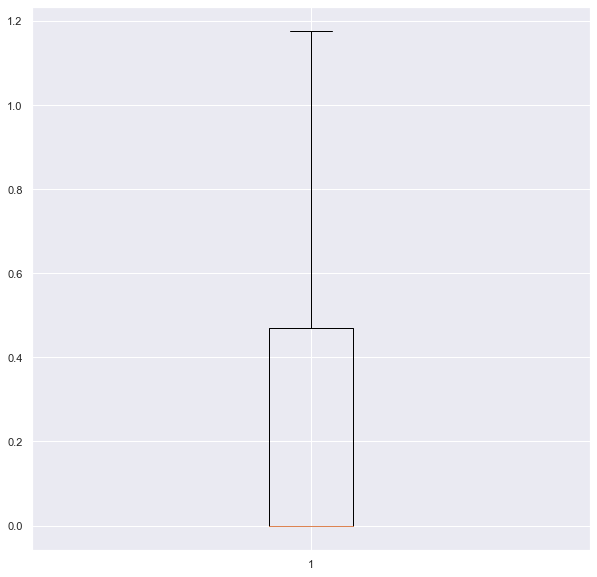

In [232]:
plt.boxplot(X_train['Rain ']) 

#### Converting left skewed dist to right skewed and applying log transformation to make it normally distributed

In [233]:
max(X_train['FFMC']+1) - X_train['FFMC']

58     10.4
1      32.6
2      49.9
68     19.9
187     3.7
       ... 
64     12.0
15     60.9
231     8.3
128    17.6
9      23.8
Name: FFMC, Length: 183, dtype: float64

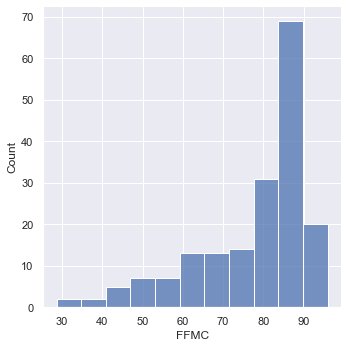

In [234]:
sns.displot(X_train['FFMC'])

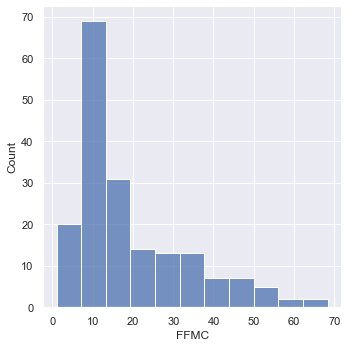

In [235]:
sns.displot(max(X_train['FFMC']+1) - X_train['FFMC'])

In [236]:
X_train['FFMC'] = np.log(max(X_train['FFMC']+1) - X_train['FFMC'])

<ipython-input-236-05ef6d08b6e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FFMC'] = np.log(max(X_train['FFMC']+1) - X_train['FFMC'])


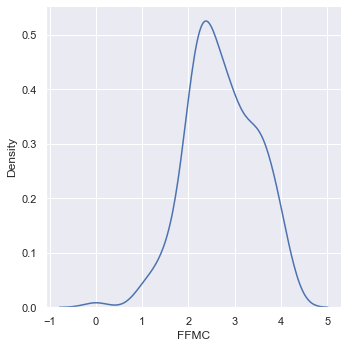

In [237]:
sns.displot(X_train['FFMC'], kind = 'kde')

In [238]:
X_train.head() #all datas are almost normally distributed

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
58,7,32,73,15,0.000000,2.341806,3.284664,4.844187,1.887070,3.555348,2.557227
1,6,29,61,13,0.832909,3.484312,1.410987,2.028148,0.693147,1.360977,0.336472
2,6,26,82,22,1.175009,3.910021,0.916291,1.960095,0.262364,0.993252,0.095310
68,8,32,60,18,0.262364,2.990720,2.424803,3.850148,1.163151,2.646175,1.280934
187,8,40,34,14,0.000000,1.308333,2.379546,3.063391,2.694627,2.360854,2.674149


In [239]:
#Scaling features


#### Scaling all features (except month)

In [240]:
X_train.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
58,7,32,73,15,0.000000,2.341806,3.284664,4.844187,1.887070,3.555348,2.557227
1,6,29,61,13,0.832909,3.484312,1.410987,2.028148,0.693147,1.360977,0.336472
2,6,26,82,22,1.175009,3.910021,0.916291,1.960095,0.262364,0.993252,0.095310
68,8,32,60,18,0.262364,2.990720,2.424803,3.850148,1.163151,2.646175,1.280934
187,8,40,34,14,0.000000,1.308333,2.379546,3.063391,2.694627,2.360854,2.674149


In [241]:
scaling_feat = [feat for feat in X_train.columns if feat not in ['month']]

In [242]:
scaling_feat

['Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

In [243]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [244]:
X_train_scal = scaler.fit_transform(X_train[scaling_feat])

In [245]:
X_train_scal

array([[0.5       , 0.76470588, 0.39130435, ..., 0.62991932, 0.83896027,
        0.73719615],
       [0.35      , 0.58823529, 0.30434783, ..., 0.23137821, 0.30688791,
        0.09699804],
       [0.2       , 0.89705882, 0.69565217, ..., 0.08757934, 0.21772517,
        0.02747597],
       ...,
       [0.5       , 0.44117647, 0.30434783, ..., 0.68993574, 0.67501332,
        0.68597431],
       [0.4       , 0.63235294, 0.34782609, ..., 0.38826928, 0.39461166,
        0.19982011],
       [0.3       , 0.85294118, 0.26086957, ..., 0.2780319 , 0.59123905,
        0.1850333 ]])

In [246]:
X_train = pd.concat([X_train['month'].reset_index(drop = True),pd.DataFrame(X_train_scal,columns= scaling_feat)],axis =1)

In [247]:
X_train

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,7,0.50,0.764706,0.391304,0.000000,0.554225,0.801207,0.840858,0.629919,0.838960,0.737196
1,6,0.35,0.588235,0.304348,0.708853,0.824617,0.388940,0.027895,0.231378,0.306888,0.096998
2,6,0.20,0.897059,0.695652,1.000000,0.925367,0.280092,0.008249,0.087579,0.217725,0.027476
3,8,0.50,0.573529,0.521739,0.223287,0.707800,0.612011,0.553888,0.388269,0.618512,0.369267
4,8,0.90,0.191176,0.347826,0.000000,0.309637,0.602054,0.326759,0.899489,0.549330,0.770902
...,...,...,...,...,...,...,...,...,...,...,...
178,8,0.60,0.705882,0.304348,0.000000,0.588092,0.541454,0.304326,0.537244,0.487082,0.458144
179,6,0.35,1.000000,0.304348,0.451595,0.972514,0.195234,0.027895,0.000000,0.168068,0.000000
180,9,0.50,0.441176,0.304348,0.000000,0.500845,0.688535,0.572904,0.689936,0.675013,0.685974
181,6,0.40,0.632353,0.347826,0.000000,0.678733,0.441236,0.231774,0.388269,0.394612,0.199820


In [285]:
y_train

58     1
1      0
2      0
68     0
187    1
      ..
64     1
15     0
231    1
128    0
9      0
Name: Result, Length: 183, dtype: uint8

### Performing all feat engg steps for test data

In [248]:
X_test.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Result
165,11,7,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0
60,31,7,2012,35,64,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7,1
61,1,8,2012,36,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0.9,0
63,3,8,2012,35,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8,0
69,9,8,2012,35,59,17,0.0,87.4,14.8,57.0,6.9,17.9,9.9,1


In [249]:
X_test.drop(drop_feat,axis =1,inplace= True)

C:\Users\SrinivaS\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [250]:
X_test

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
165,7,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8
60,7,35,64,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7
61,8,36,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0.9
63,8,35,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8
69,8,35,59,17,0.0,87.4,14.8,57.0,6.9,17.9,9.9
...,...,...,...,...,...,...,...,...,...,...,...
204,8,35,66,15,0.1,82.7,32.7,96.8,3.3,35.5,7.7
152,6,37,37,13,0.0,92.5,27.2,52.4,11.7,27.1,18.4
178,7,33,63,17,1.1,72.8,20.9,56.6,1.6,21.7,2.5
229,9,29,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3


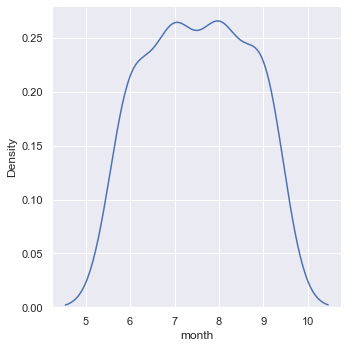

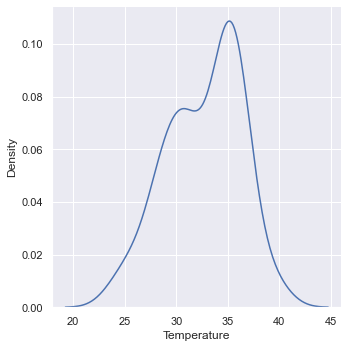

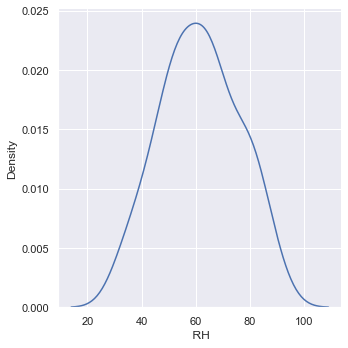

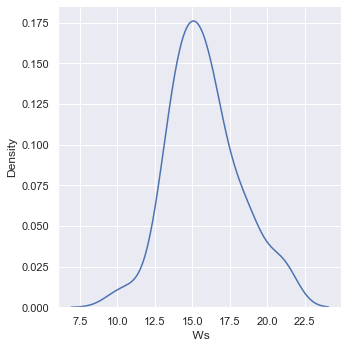

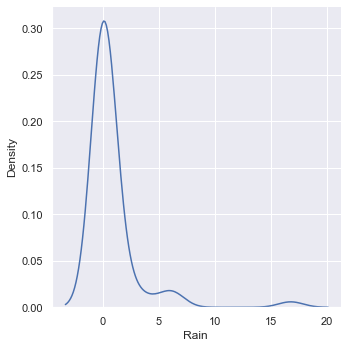

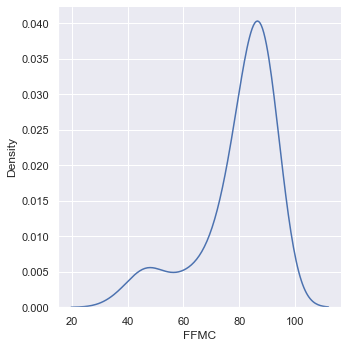

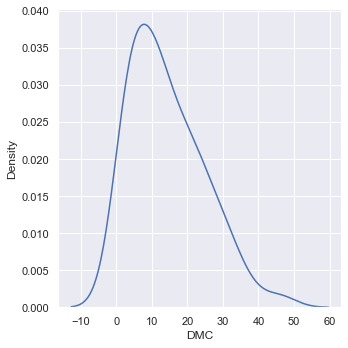

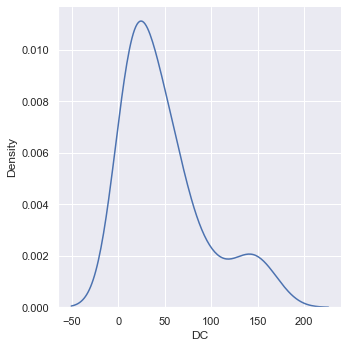

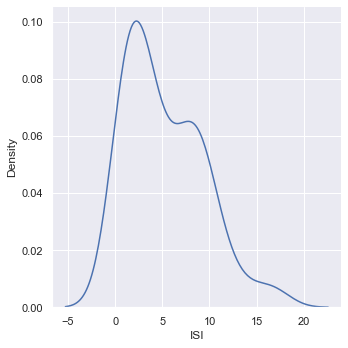

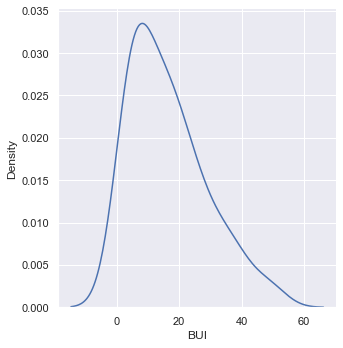

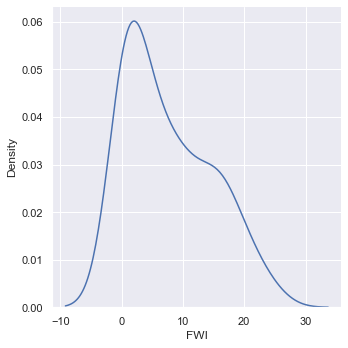

In [251]:
for i in X_test.columns:
    sns.displot(X_test[i],kind = 'kde')

In [252]:
rh_skew_feat

['Rain ', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [253]:
X_test['Rain ']

165    2.9
60     0.0
61     0.0
63     0.3
69     0.0
      ... 
204    0.1
152    0.0
178    1.1
229    0.0
49     0.1
Name: Rain , Length: 61, dtype: float64

In [254]:
0 in X_test['Rain '].unique()

True

In [255]:
ff['Rain '].unique()

array([ 0. ,  1.3, 13.1,  2.5,  0.2,  1.2,  0.5,  3.1,  0.7,  0.6,  0.3,
        0.1,  0.4,  1. ,  1.4,  0.8, 16.8,  7.2, 10.1,  3.8,  0.9,  1.8,
        4.6,  8.3,  5.8,  4. ,  2. ,  4.7,  8.7,  4.5,  1.1,  1.7,  2.2,
        6. ,  1.9,  2.9,  4.1,  6.5,  4.4])

In [256]:
for feat in rh_skew_feat:
    
    X_tst_copy = X_test.copy()
    
    if 0 in X_test[feat].unique():
        X_test[feat] = np.log((X_test[feat] + 1))
    
    else:
        X_test[feat] = np.log(X_test[feat])

<ipython-input-256-e4386b832472>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feat] = np.log((X_test[feat] + 1))
<ipython-input-256-e4386b832472>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feat] = np.log(X_test[feat])


In [257]:
X_test

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
165,7,34,56,15,1.360977,74.8,1.960095,2.251292,0.470004,1.916923,0.587787
60,7,35,64,17,0.000000,87.2,3.462606,4.981550,1.916923,3.718438,2.815409
61,8,36,45,14,0.000000,78.8,1.568616,2.322388,0.693147,1.547563,0.641854
63,8,35,63,14,0.262364,76.6,1.740466,2.302585,0.530628,1.704748,0.587787
69,8,35,59,17,0.000000,87.4,2.694627,4.043051,1.931521,2.884801,2.388763
...,...,...,...,...,...,...,...,...,...,...,...
204,8,35,66,15,0.095310,82.7,3.487375,4.572647,1.193922,3.569533,2.163323
152,6,37,37,13,0.000000,92.5,3.303217,3.958907,2.459589,3.299534,2.965273
178,7,33,63,17,0.741937,72.8,3.039749,4.036009,0.470004,3.077312,1.252763
229,9,29,49,19,0.000000,88.6,2.442347,3.508556,2.208274,2.517696,2.424803


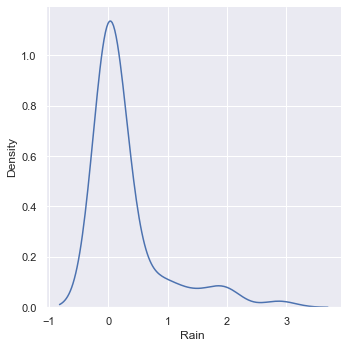

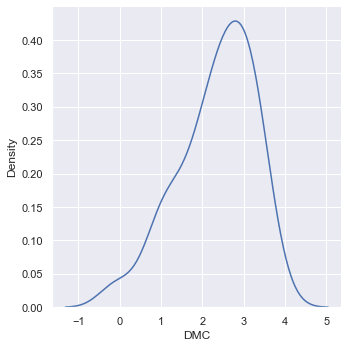

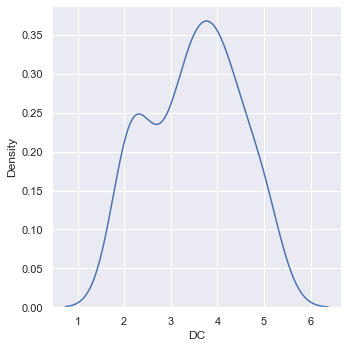

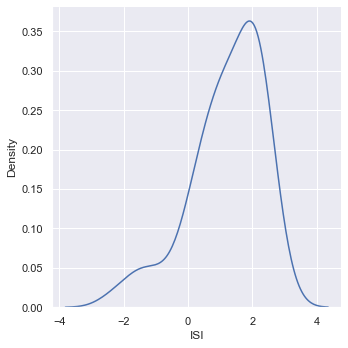

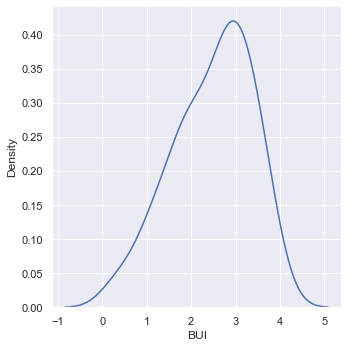

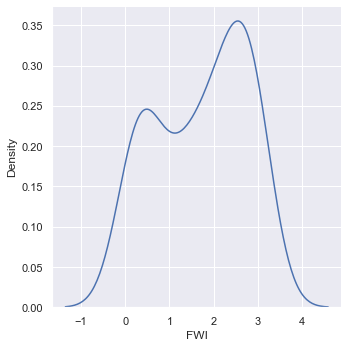

In [258]:
for i in range(len(rh_skew_feat)):
    sns.displot(X_test[rh_skew_feat[i]],kind = 'kde')

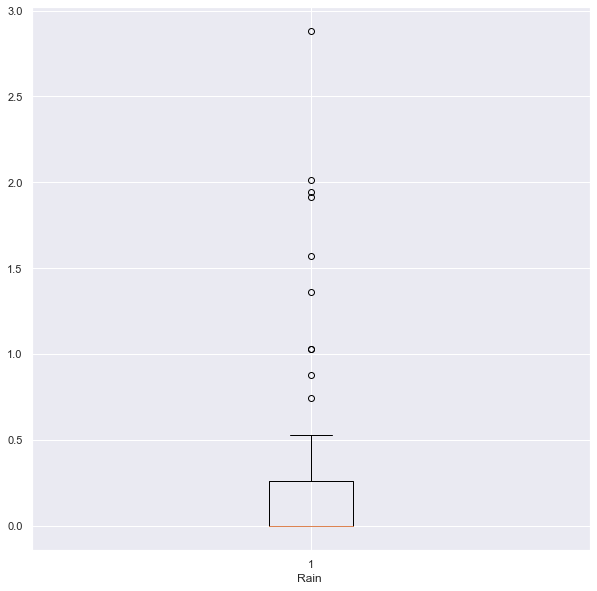

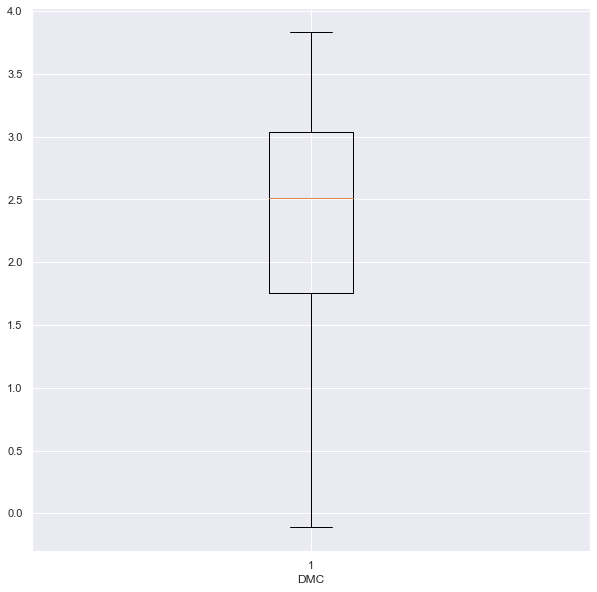

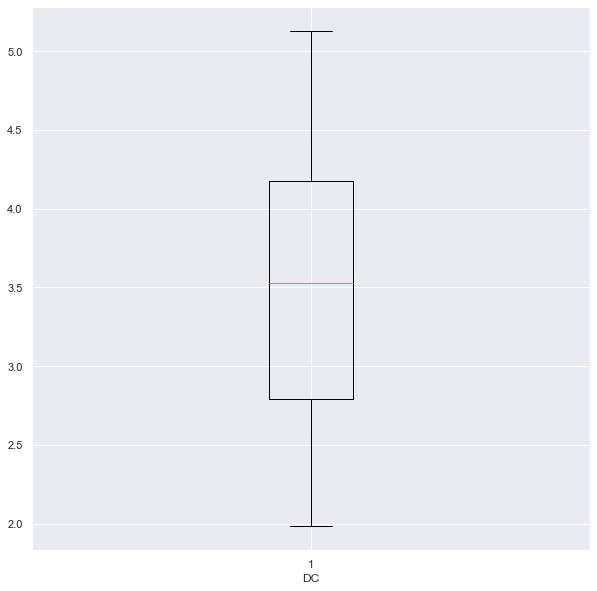

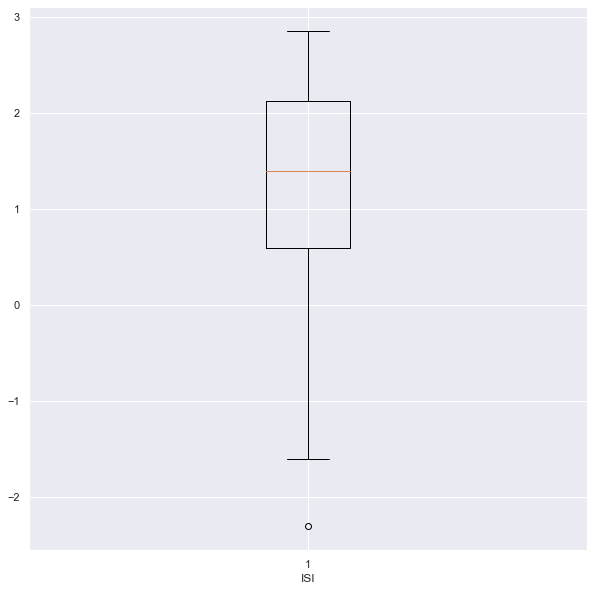

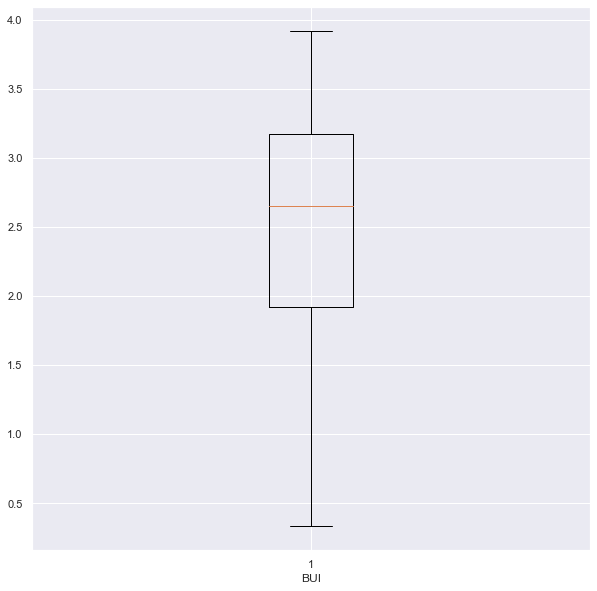

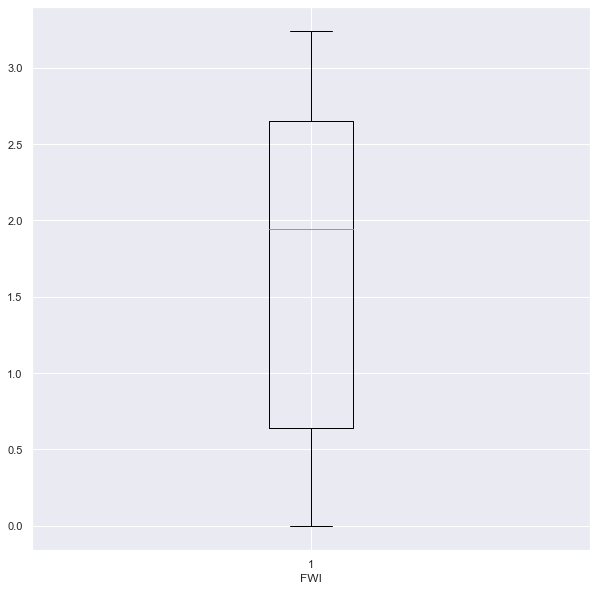

In [259]:
for i in range(len(rh_skew_feat)):
    plt.boxplot(X_test[rh_skew_feat[i]]) 
    plt.xlabel(rh_skew_feat[i])
    plt.show()

#### should have written a function here. My bad!!

In [260]:
q1_t = X_test['Rain '].quantile(.25)
q1_t

0.0

In [261]:
q3_t = X_test['Rain '].quantile(.75)
q3_t

0.26236426446749106

In [262]:
IQR_t = q3_t- q1_t
IQR_t

0.26236426446749106

In [263]:
up_lim_t = q3_t + (1.5*(IQR_t))
up_lim_t

0.6559106611687276

In [264]:
low_lim_t =q1_t - (1.5 * IQR_t)
low_lim_t

-0.3935463967012366

In [265]:
X_test[X_test['Rain '] < low_lim_t]

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI


In [266]:
X_test[X_test['Rain '] > up_lim_t]

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
165,7,34,56,15,1.360977,74.8,1.960095,2.251292,0.470004,1.916923,0.587787
102,9,30,77,21,1.029619,58.5,0.641854,2.128232,0.095310,0.875469,0.262364
222,9,34,71,14,2.014903,64.5,1.193922,2.208274,0.000000,1.252763,0.336472
162,7,35,47,18,1.945910,80.8,2.282382,2.272126,1.131402,2.240710,1.386294
121,9,25,78,14,0.875469,45.0,0.641854,2.014903,-1.609438,0.875469,0.095310
120,9,26,80,16,1.029619,47.4,1.064711,2.041220,-1.203973,1.098612,0.095310
116,9,26,81,21,1.916923,48.6,1.098612,2.041220,-0.916291,1.098612,0.095310
164,7,34,51,16,1.568616,77.5,2.079442,2.251292,0.693147,2.041220,0.832909
91,8,28,80,21,2.879198,52.5,2.163323,2.163323,-0.510826,2.116256,0.262364
178,7,33,63,17,0.741937,72.8,3.039749,4.036009,0.470004,3.077312,1.252763


In [267]:
X_test.loc[X_test['Rain ']>up_lim_t, 'Rain '] = up_lim_t

C:\Users\SrinivaS\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [268]:
q1_I = X_test['ISI'].quantile(.25)
q1_I

0.5877866649021191

In [269]:
q3_I = X_test['ISI'].quantile(.75)
q3_I

2.1162555148025524

In [270]:
IQR_I = q3_I- q1_I
IQR_I

1.5284688499004333

In [271]:
up_lim_I = q3_I + (1.5*(IQR_I))
up_lim_I

4.4089587896532025

In [272]:
low_lim_I =q1_I - (1.5 * IQR_I)
low_lim_I

-1.7049166099485311

In [273]:
X_test[X_test['ISI'] < low_lim_I]

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
217,9,29,86,16,0.0,37.9,-0.105361,2.104134,-2.302585,0.336472,0.0


In [274]:
X_test[X_test['ISI'] > up_lim_I]

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI


In [275]:
X_test.loc[X_test['ISI']<low_lim_I, 'ISI'] = low_lim_I

C:\Users\SrinivaS\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [276]:
X_test[X_test['ISI'] < low_lim_I]

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI


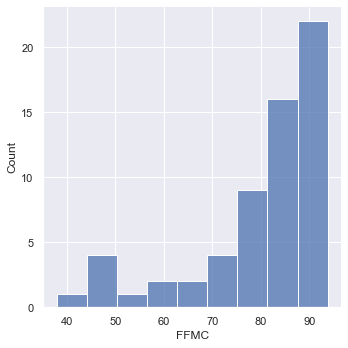

In [277]:
sns.displot(X_test['FFMC'])

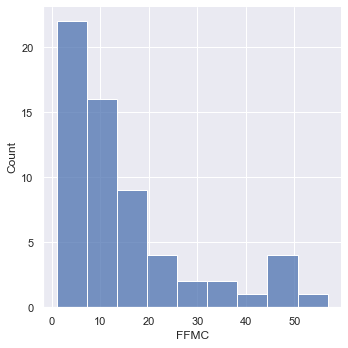

In [278]:
sns.displot(max(X_test['FFMC']+1) - X_test['FFMC'])

In [279]:
X_test['FFMC'] = np.log(max(X_test['FFMC']+1) - X_test['FFMC'])

<ipython-input-279-ea461d278c6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['FFMC'] = np.log(max(X_test['FFMC']+1) - X_test['FFMC'])


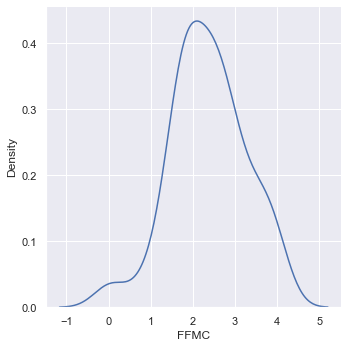

In [280]:
sns.displot(X_test['FFMC'], kind = 'kde')

In [281]:
X_test_scal = scaler.transform(X_test[scaling_feat])

In [282]:
X_test_scal

array([[ 0.6       ,  0.51470588,  0.39130435,  0.55821753,  0.7089865 ,
         0.50976124,  0.09231453,  0.15689107,  0.44168894,  0.16944683],
       [ 0.65      ,  0.63235294,  0.47826087,  0.        ,  0.47999273,
         0.84036035,  0.88051282,  0.63988449,  0.87850498,  0.81162455],
       [ 0.7       ,  0.35294118,  0.34782609,  0.        ,  0.65617611,
         0.42362374,  0.11283921,  0.23137821,  0.35212967,  0.1850333 ],
       [ 0.65      ,  0.61764706,  0.34782609,  0.22328701,  0.68666641,
         0.46143613,  0.10712239,  0.17712806,  0.39024268,  0.16944683],
       [ 0.65      ,  0.55882353,  0.47826087,  0.        ,  0.47368128,
         0.67138117,  0.60957766,  0.64475769,  0.67637171,  0.68863129],
       [ 0.7       ,  0.47058824,  0.43478261,  0.        ,  0.39468868,
         0.87653302,  0.91023502,  0.78171398,  0.91300659,  0.90763449],
       [ 0.7       ,  0.47058824,  0.56521739,  0.        ,  0.40771943,
         0.70316493,  0.76778557,  0.76862179

In [283]:
X_test = pd.concat([X_test['month'].reset_index(drop = True),pd.DataFrame(X_test_scal, columns= scaling_feat)], axis =1)

In [284]:
X_test

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,7,0.60,0.514706,0.391304,0.558218,0.708986,0.509761,0.092315,0.156891,0.441689,0.169447
1,7,0.65,0.632353,0.478261,0.000000,0.479993,0.840360,0.880513,0.639884,0.878505,0.811625
2,8,0.70,0.352941,0.347826,0.000000,0.656176,0.423624,0.112839,0.231378,0.352130,0.185033
3,8,0.65,0.617647,0.347826,0.223287,0.686666,0.461436,0.107122,0.177128,0.390243,0.169447
4,8,0.65,0.558824,0.478261,0.000000,0.473681,0.671381,0.609578,0.644758,0.676372,0.688631
...,...,...,...,...,...,...,...,...,...,...,...
56,8,0.65,0.661765,0.391304,0.081114,0.590056,0.845810,0.762467,0.398541,0.842400,0.623642
57,6,0.75,0.235294,0.304348,0.000000,0.197121,0.805290,0.585286,0.821031,0.776933,0.854827
58,7,0.55,0.617647,0.478261,0.558218,0.731543,0.747319,0.607545,0.156891,0.723050,0.361146
59,9,0.35,0.411765,0.565217,0.000000,0.431808,0.615872,0.455274,0.737140,0.587359,0.699021


## Model building

In [286]:
from sklearn.linear_model import LogisticRegression

In [287]:
Logreg = LogisticRegression()

In [289]:
Logreg.fit(X_train,y_train)

LogisticRegression()

In [290]:
Logreg_pred = Logreg.predict(X_test)

In [291]:
Logreg_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1], dtype=uint8)

## Model score

In [292]:
from sklearn.metrics import accuracy_score

## TEST DATA accuracy - achieved 90% as instructed!!! :-)

In [293]:
accuracy_score(y_test,Logreg_pred) #TEST DATA accuracy

0.9016393442622951

In [298]:
Logreg.score(X_test,y_test) #TEST DATA score

0.9016393442622951

In [295]:
accuracy_score(y_test,Logreg_pred) #TRAIN DATA accuracy

0.9508196721311475

In [299]:
from sklearn.metrics import confusion_matrix

In [300]:
conf_mat = confusion_matrix(y_test,Logreg_pred)
conf_mat

array([[19,  0],
       [ 6, 36]], dtype=int64)

In [301]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [302]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9016393442622951

In [303]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [304]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.76

In [305]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8636363636363636

In [307]:
from sklearn.metrics import roc_curve, roc_auc_score

In [309]:
# Area Under Curve
auc = roc_auc_score(y_test, Logreg_pred)
auc

0.9285714285714286